In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

# 다항회귀와 과최적화

# 비선형 데이터

다음은 선형모형으로는 회귀분석이 어려운 데이터의 한 예이다.

In [4]:
def make_nonlinear(seed=0):
    np.random.seed(seed)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1
    X = X[:, np.newaxis]
    return (X, y)

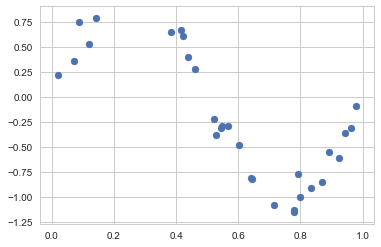

In [5]:
X, y = make_nonlinear()
plt.scatter(X, y)
plt.show()

# 선형 기저함수 모형

이러한 비선형 데이터를 회귀분석 할 때는 직접 비선형 모형을 사용하기 보다는 다음과 같은 선형 기저함수 모형을 사용한다.

# 다항회귀

다항회귀는 다음과 같은 다항식 함수를 기저함수로 사용하는 기저함수 모형의 일종이다.
$$1, x, x^2, \ldots, x^M$$

따라서 종속변수와 독립변수의 관계는 다음과 같이 표현할 수 있다.
$$y = w_0 + w_1x + w_2x^2  + \ldots  + w_M x^M$$

# 과최적화

모형을 특정 샘플 데이터에 대해 과도하게 최적화하는 것을 과최적화(overfitting)이라고 한다.

과최적화는 
- 독립변수 데이터 갯수에 비해 모형 모수의 수가 과도하게 크거나
- 독립변수 데이터가 서로 독립이 아닌 경우에 발생

이러한 상황에서는 같은 조건에 대해 답이 복수개 존재할 수 있기 때문이다.

과최적화가 문제가 되는 이유는 다음과 같다.
- 트레이닝에 사용되지 않은 새로운 독립변수 값을 입력하면 오차가 커진다.(cross-validation 오차)
- 샘플이 조금만 변화해도 가중치 계수의 값이 크게 달라진다.(추정의 부정확함)